Churn rates for telecom operators vary widely by region and company. In the U.S., major operators have typically seen monthly postpaid churn rates of 0.5% to 2%. European rates often range between 1% and 3%, while Asia's diverse markets show significant variation. For instance, India has experienced high churn in the past due to competitive pricing. In this project, we are going to analysis a dataset that contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

In [ ]:
# 1) Load the dataset
import pandas as pd

telco_df = pd.read_csv('/content/Telco-Customer-Churn.csv')
print(telco_df.columns)
telco_df.head()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#2. Checking the data types of all the columns
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#3. Convert 'TotalCharges' to a numerical data type in the 'telco_df' DataFrame
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')

# Check for any null values in the DataFrame
null_values = telco_df.isnull().sum()
print(null_values)


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


After looking at the above output, we can say that there are 11 missing values for Total Charges. Let us replace remove these 11 rows from our data set.

In [ ]:
#4. Cleaning, handling missing values, replace/drop missing values, columnlists, convert variables

# Removing missing values
telco_df.dropna(inplace=True)

# Remove customer IDs from the data set
df2 = telco_df.iloc[:, 1:]

# Converting the predictor variable to a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Convert all the categorical variables into dummy variables
telco_df_dummies = pd.get_dummies(df2)
telco_df_dummies.head()

# Display the first few rows of the DataFrame with dummy variables
telco_df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


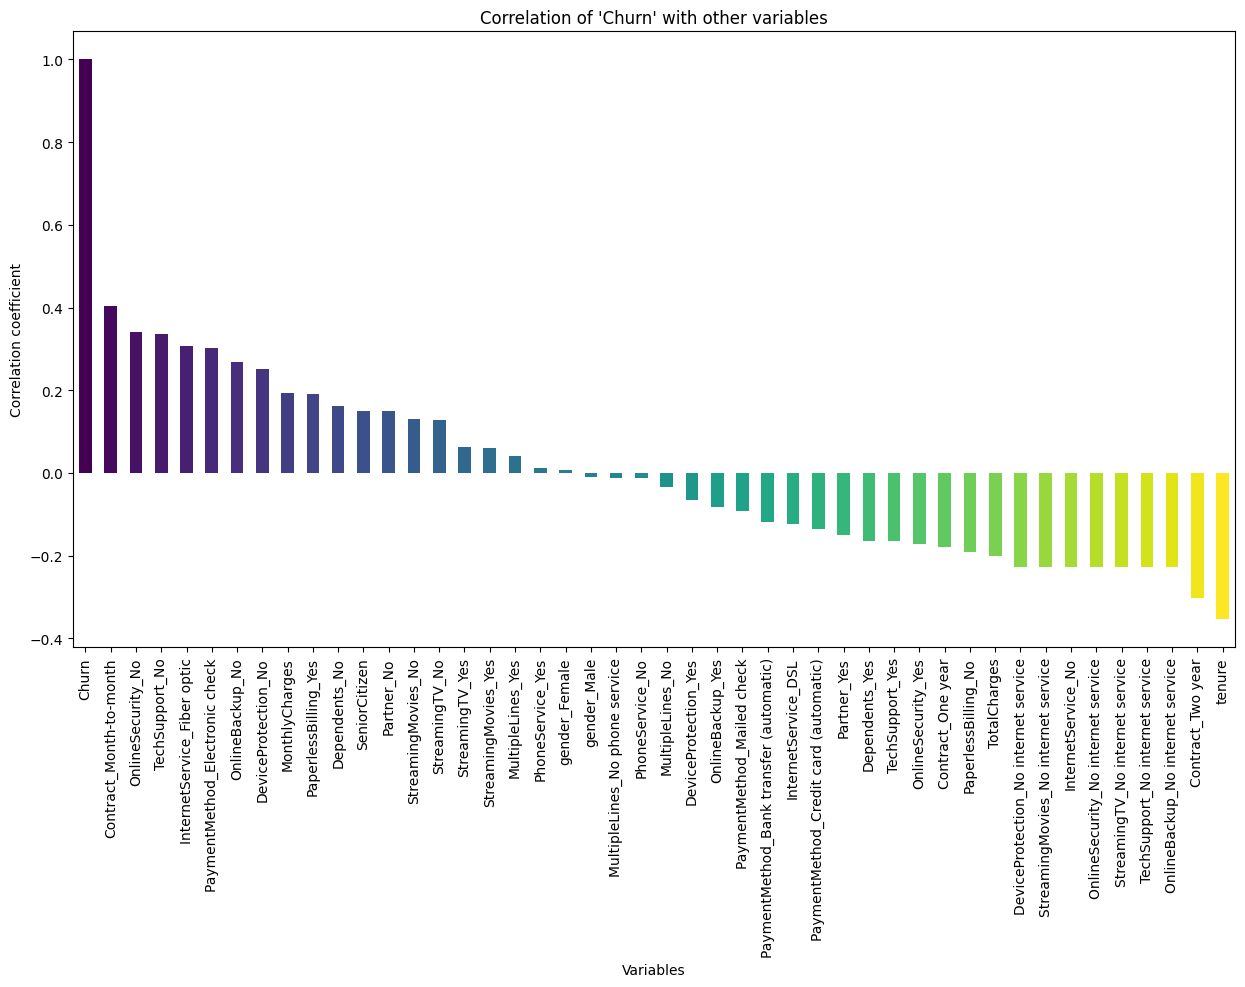

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
#5. Get Correlation of "Churn" with other variables in telco_df_dummies:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Get the correlation values and sort them
correlations = telco_df_dummies.corr()['Churn'].sort_values(ascending=False)

# Generate a color array using a colormap
colors = cm.viridis(np.linspace(0, 1, len(correlations)))

plt.figure(figsize=(15,8))
correlations.plot(kind='bar', color=colors)

plt.title("Correlation of 'Churn' with other variables")
plt.ylabel('Correlation coefficient')
plt.xlabel('Variables')
plt.show()

print(telco_df.columns)

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.


Let us first understand the gender, age range, patner and dependent status of the customers


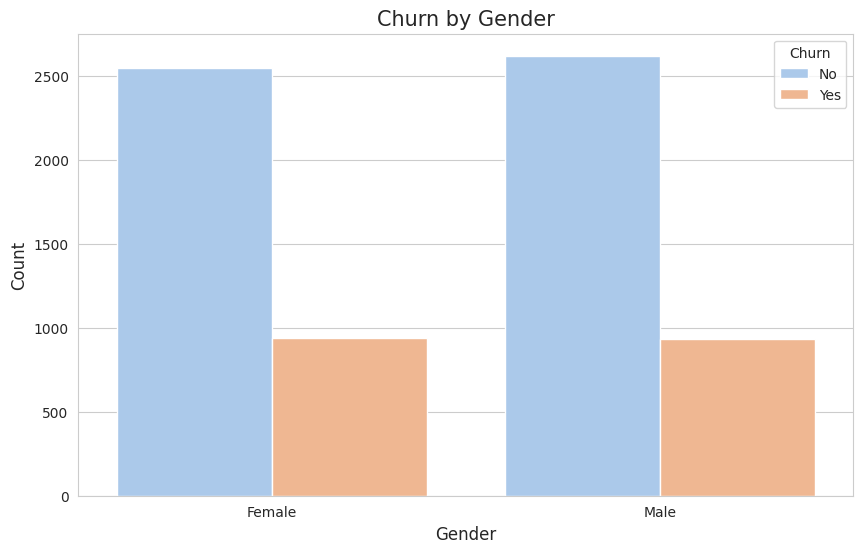

In [ ]:
#6.1 Visualization of the data - demographic information

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the aesthetics for Seaborn plots
sns.set_style("whitegrid")
sns.set_palette("pastel")

# 6.1.1 Churn by Gender
plt.figure(figsize=(10,6))
sns.countplot(data=telco_df, x='gender', hue='Churn')
plt.title('Churn by Gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn')
plt.show()



About half of the customers in our data set are male while the other half are female.

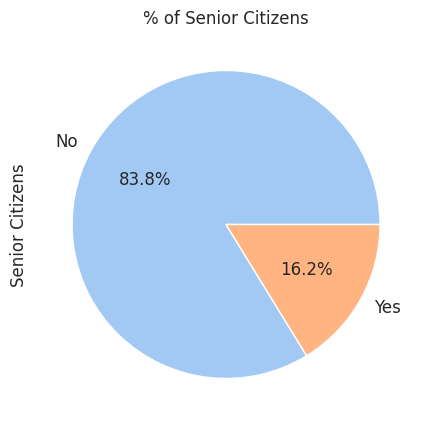

In [ ]:
# 6.1.2. Senior Citizen

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ax = (telco_df['SeniorCitizen'].value_counts()*100.0 /len(telco_df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'], figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens', fontsize=12)
ax.set_title('% of Senior Citizens', fontsize=12)

plt.show()

There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

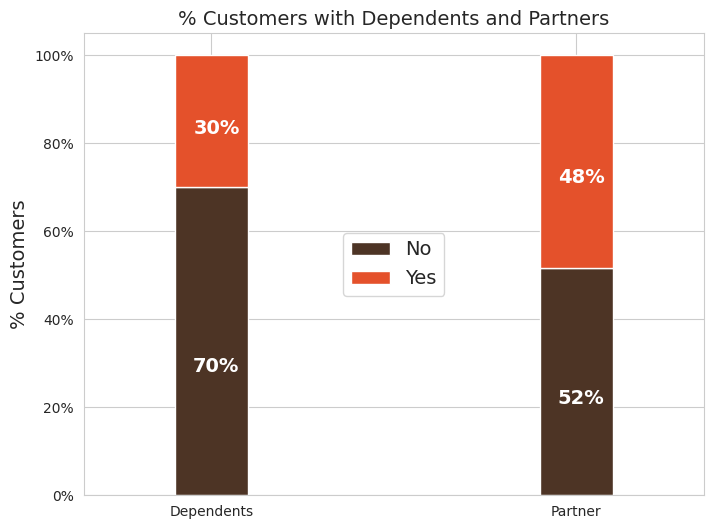

In [ ]:
#6.1.3 Customer with Dependent and Partners

import matplotlib.ticker as mtick

# Melt the telco_df DataFrame
df2 = pd.melt(telco_df, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])

# Group by 'variable' and 'value' and unstack
df3 = df2.groupby(['variable', 'value']).count().unstack()

# Calculate percentage over total customers
df3 = df3 * 100 / len(telco_df)

colors = ['#4D3425', '#E4512B']

# Plot
ax = df3.loc[:, 'customerID'].plot.bar(stacked=True, color=colors,
                                       figsize=(8, 6), rot=0,
                                       width=0.2)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('')
ax.set_title('% Customers with Dependents and Partners', size=14)
ax.legend(loc='center', prop={'size': 14})

# Annotate the bar plot
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='white',
                weight='bold',
                size=14)

plt.show()


Partner and dependent status - About 50% of the customers have a partner, while only 30% of the total customers have dependents.

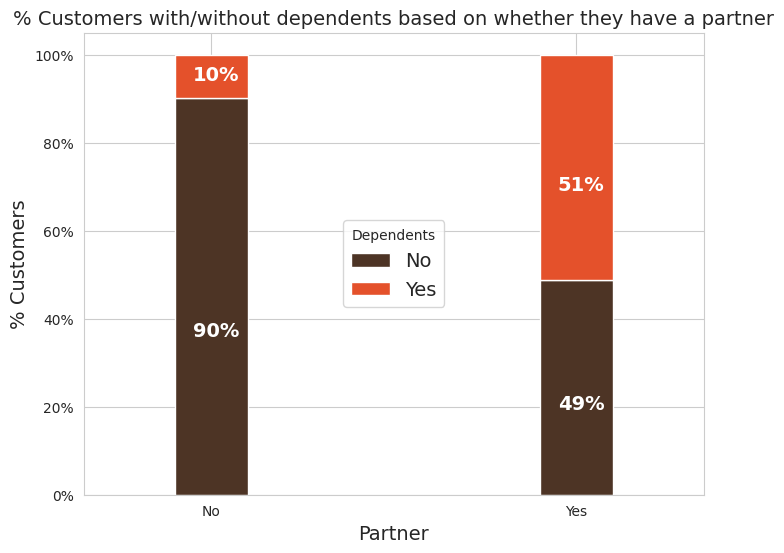

In [ ]:
#6.1.4 Customers with/without dependents based on whether they have a partner

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = ['#4D3425','#E4512B']
partner_dependents = telco_df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                      width = 0.2,
                                                                      stacked = True,
                                                                      rot = 0,
                                                                      figsize = (8,6),
                                                                      color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center', prop={'size':14}, title='Dependents', fontsize=14)
ax.set_ylabel('% Customers', size=14)
ax.set_title('% Customers with/without dependents based on whether they have a partner', size=14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color='white',
                weight='bold',
                size=14)

plt.show()


Interestingly, among the customers who have a partner, only about half of them also have a dependent, while other half do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (80%) of them do not have any dependents .


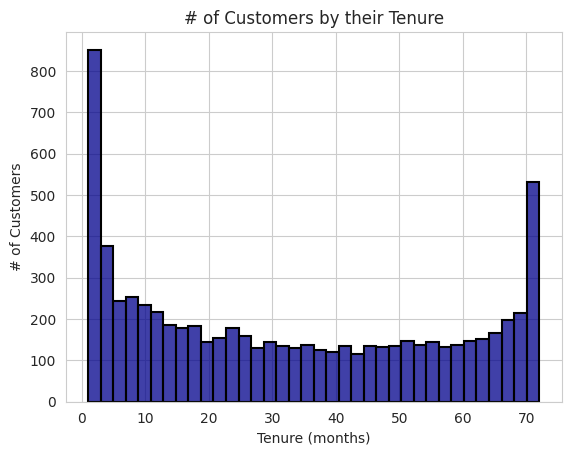

In [ ]:
#6.2 Customer Account Information

#6.2.1 Tenure

ax = sns.histplot(telco_df['tenure'], kde=False,
                  bins=int(180/5), color='darkblue',
                  edgecolor='black', linewidth=1.5)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their Tenure')
plt.show()


To better understand this, we will check the following visuazlization with restpect to different parameters.

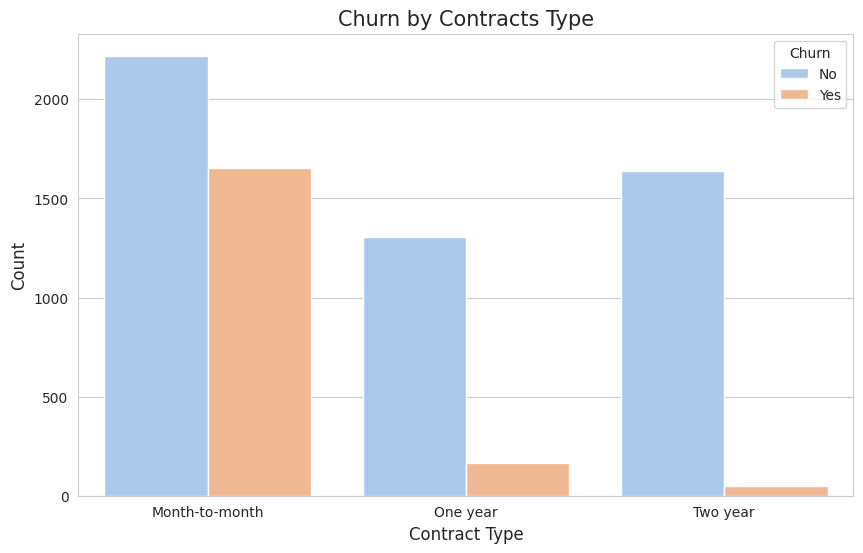

In [ ]:
# 6.2.2.1 Churn by Contracts Type
plt.figure(figsize=(10,6))
sns.countplot(data=telco_df, x='Contract', hue='Churn')
plt.title('Churn by Contracts Type', fontsize=15)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn')
plt.show()

As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.


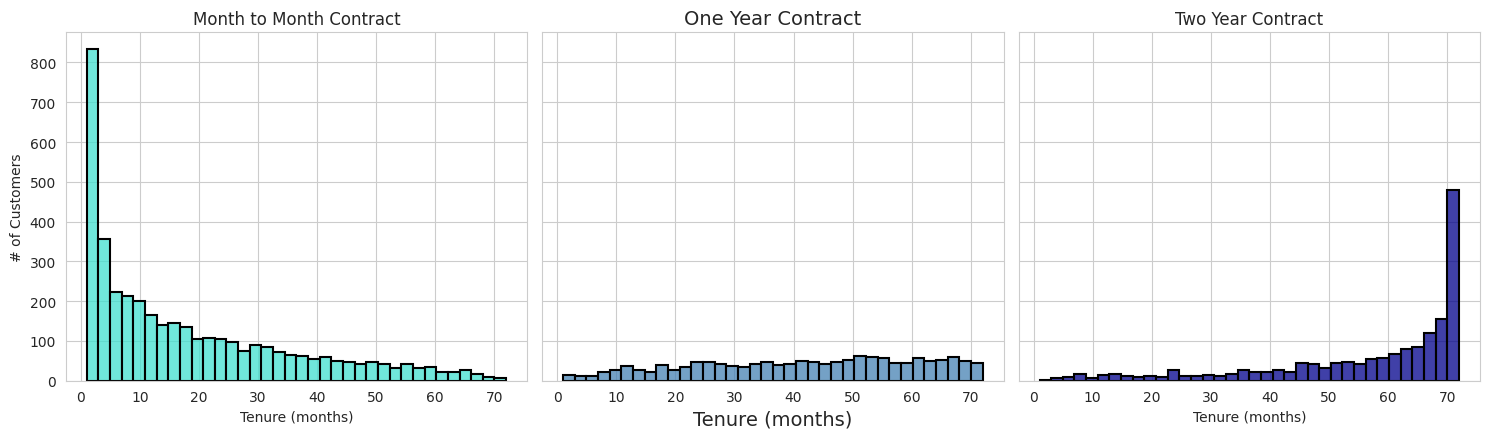

In [ ]:
# 6.2.2.2 Churn by Contract Types (By Years)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 4.5))

# Month to Month Contract
sns.histplot(telco_df[telco_df['Contract'] == 'Month-to-month']['tenure'],
             kde=False,
             bins=int(180/5),
             color='turquoise',
             edgecolor='black',
             linewidth=1.5,
             ax=ax1)
ax1.set_ylabel('# of Customers')
ax1.set_xlabel('Tenure (months)')
ax1.set_title('Month to Month Contract')

# One Year Contract
sns.histplot(telco_df[telco_df['Contract'] == 'One year']['tenure'],
             kde=False,
             bins=int(180/5),
             color='steelblue',
             edgecolor='black',
             linewidth=1.5,
             ax=ax2)
ax2.set_xlabel('Tenure (months)', size=14)
ax2.set_title('One Year Contract', size=14)

# Two Year Contract
sns.histplot(telco_df[telco_df['Contract'] == 'Two year']['tenure'],
             kde=False,
             bins=int(180/5),
             color='darkblue',
             edgecolor='black',
             linewidth=1.5,
             ax=ax3)
ax3.set_xlabel('Tenure (months)')
ax3.set_title('Two Year Contract')

plt.tight_layout()
plt.show()


Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

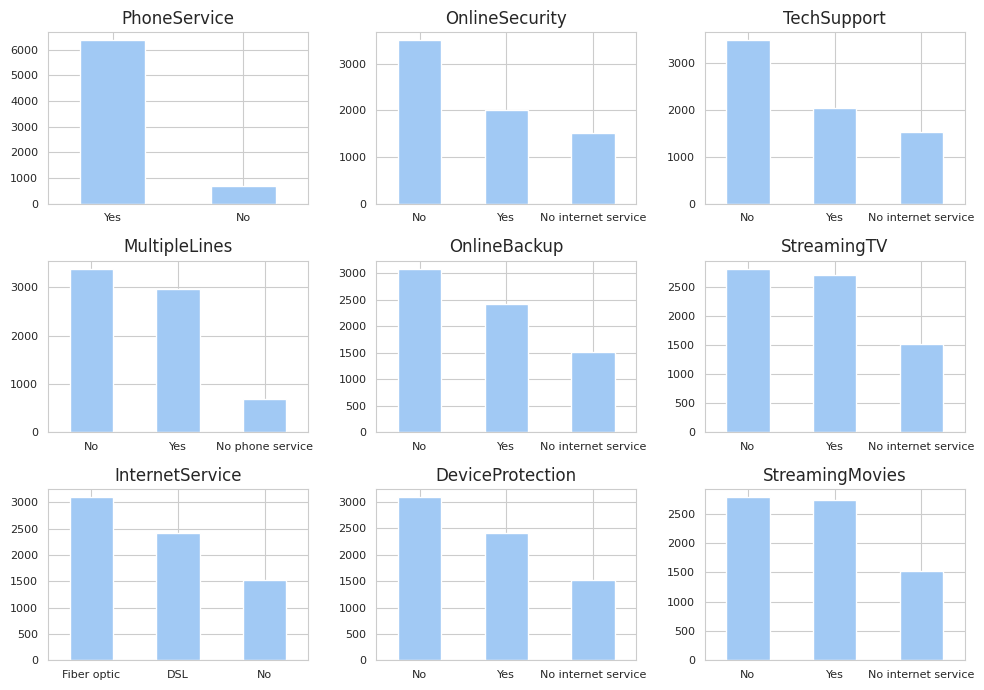

In [ ]:
# 6.3 Distribution of various services used by customers

services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 7))
for i, item in enumerate(services):
    if i < 3:
        ax = telco_df[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0)
    elif 3 <= i < 6:
        ax = telco_df[item].value_counts().plot(kind='bar', ax=axes[i-3, 1], rot=0)
    else:
        ax = telco_df[item].value_counts().plot(kind='bar', ax=axes[i-6, 2], rot=0)

    ax.set_title(item)
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()

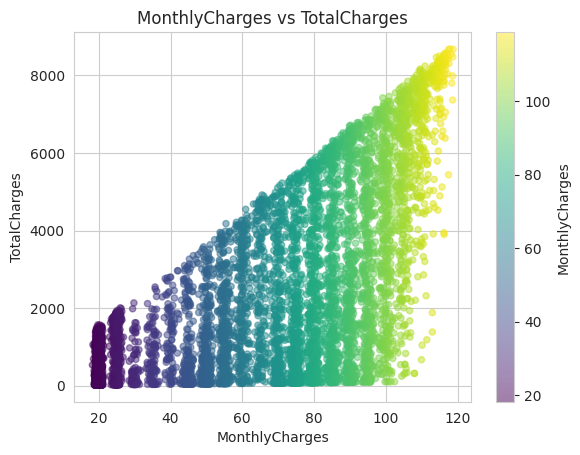

In [ ]:
# 6.4 Relation between monthly and total charges

ax = telco_df.plot.scatter(x='MonthlyCharges',
                           y='TotalCharges',
                           c='MonthlyCharges',
                           colormap='viridis',
                           alpha=0.5)  # alpha parameter is for transparency

ax.set_title('MonthlyCharges vs TotalCharges')
plt.show()

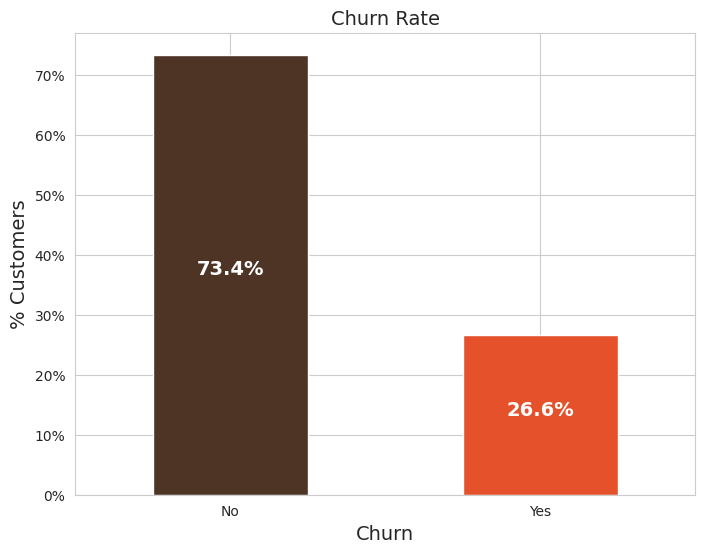

In [ ]:
# 6.5 Predictor variable (Churn) and its interaction with other important variables

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

# Define colors for the bars
colors = ['#4D3425', '#E4512B']

# Calculate the percentage of churned and non-churned customers
churn_percentage = (telco_df['Churn'].value_counts() * 100.0 / len(telco_df))

# Create the bar chart
ax = churn_percentage.plot(kind='bar',
                           stacked=True,
                           rot=0,
                           color=colors,
                           figsize=(8, 6))

# Format y-axis to show percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set axis labels and title with specific font sizes
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

# Annotate each bar with the percentage value
for patch in ax.patches:
    # Get the height of the bar (which is the data value)
    height = patch.get_height()

    # Place the annotation text in the middle of the bar
    ax.text(patch.get_x() + patch.get_width() / 2,
            patch.get_y() + height / 2,
            f'{height:.1f}%',
            fontsize=14,  # Keeping only the 'fontsize' argument
            color='white',
            ha='center',  # center the text horizontally
            weight='bold')

plt.show()

In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

<Axes: xlabel='Churn', ylabel='tenure'>

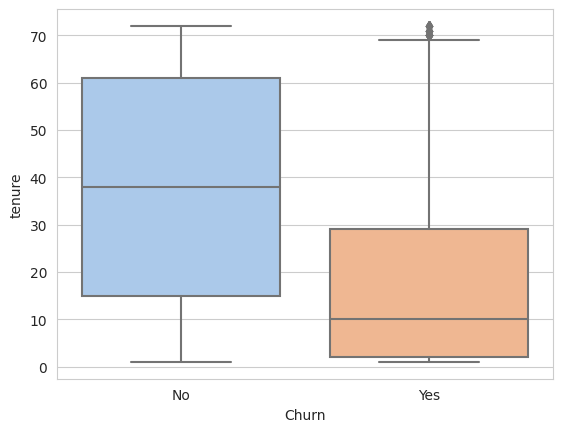

In [ ]:
# 6.5.1 Churn vs Tenure

sns.boxplot(x=telco_df['Churn'], y=telco_df['tenure'])

The customers who do not churn, they tend to stay for a longer tenure with the telecom company.

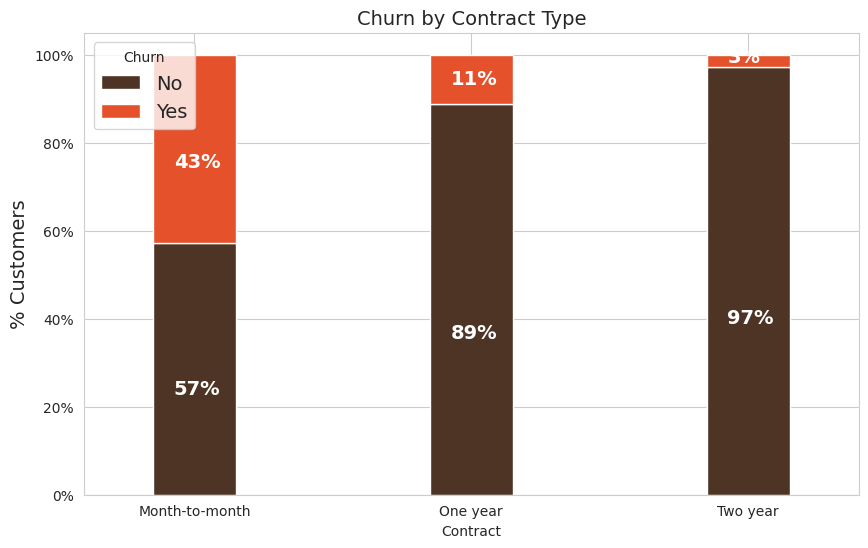

In [ ]:
# 6.5.2 Churn by Contract Type

import matplotlib.ticker as mtick

colors = ['#4D3425','#E4512B']

# Group by 'Contract' and 'Churn' and then pivot the 'Churn' entries into columns
contract_churn = telco_df.groupby(['Contract', 'Churn']).size().unstack()

# Calculate the percentages and then plot
ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width=0.3,
                                                                stacked=True,
                                                                rot=0,
                                                                figsize=(10,6),
                                                                color=colors)

# Formatting and labeling
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size':14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Contract Type', size=14)

# Annotate percentages on the bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white',
                weight='bold',
                size=14)

plt.show()

The customers who have a month to month contract have a very high churn rate.

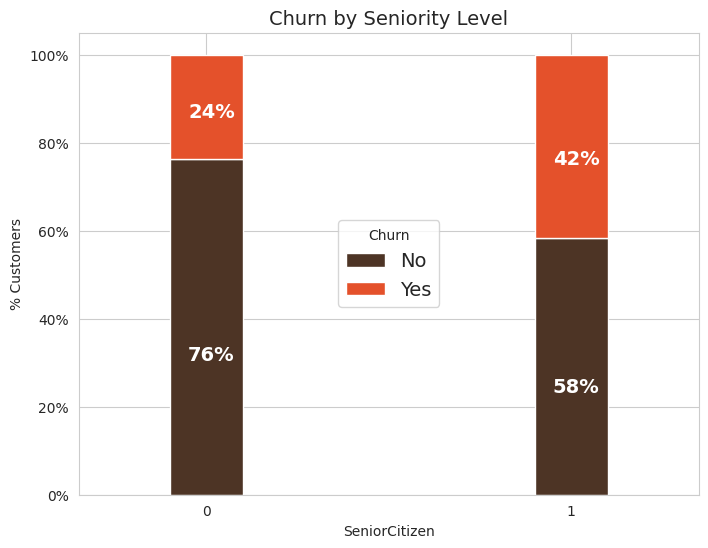

In [ ]:
# 6.5.3 Churn by Seniority Type

colors = ['#4D3425','#E4512B']

# Group by 'SeniorCitizen' and 'Churn' and then pivot the 'Churn' entries into columns
seniority_churn = telco_df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Calculate the percentages and then plot
ax = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width=0.2,
                                                                stacked=True,
                                                                rot=0,
                                                                figsize=(8,6),
                                                                color=colors)

# Formatting and labeling
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center', prop={'size':14}, title='Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level', size=14)

# Annotate percentages on the bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white',
                weight='bold',
                size=14)

plt.show()


 Senior Citizens have almost double the churn rate than younger population.

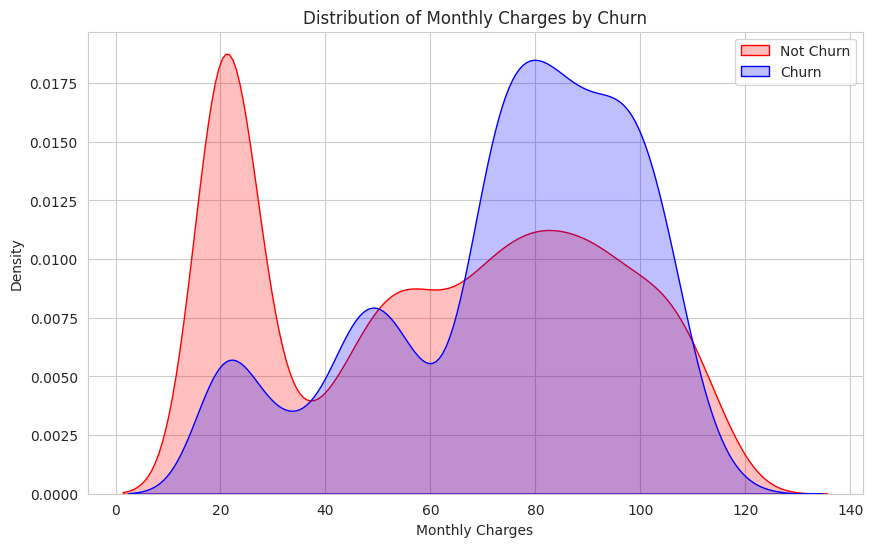

In [ ]:
#6.5.4 Churn by Monthly Charges

# Filter the data based on Churn status
monthly_charges_no_churn = telco_df.MonthlyCharges[telco_df["Churn"] == 'No']
monthly_charges_churn = telco_df.MonthlyCharges[telco_df["Churn"] == 'Yes']

# Initialize the plot
plt.figure(figsize=(10, 6))

# KDE plot for customers who did not churn
sns.kdeplot(monthly_charges_no_churn, color="Red", fill=True, label="Not Churn")

# KDE plot for customers who churned
sns.kdeplot(monthly_charges_churn, color="Blue", fill=True, label="Churn")

# Setting the legend, labels, and title
plt.legend(loc='upper right')
plt.ylabel('Density')
plt.xlabel('Monthly Charges')
plt.title('Distribution of Monthly Charges by Churn')

# Display the plot
plt.show()

Higher % of customers churn when the monthly charges are high.

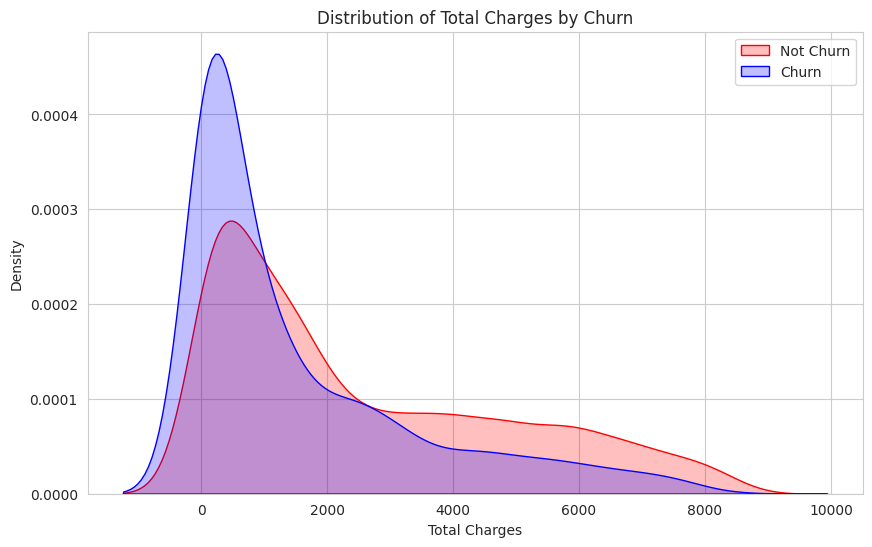

In [ ]:
#6.5.5 Churn by Total Charges

# Filter the data based on Churn status
total_charges_no_churn = telco_df.TotalCharges[telco_df["Churn"] == 'No']
total_charges_churn = telco_df.TotalCharges[telco_df["Churn"] == 'Yes']

# Initialize the plot
plt.figure(figsize=(10, 6))

# KDE plot for customers who did not churn
sns.kdeplot(total_charges_no_churn, color="Red", fill=True, label="Not Churn")

# KDE plot for customers who churned
sns.kdeplot(total_charges_churn, color="Blue", fill=True, label="Churn")

# Setting the legend, labels, and title
plt.legend(loc='upper right')
plt.ylabel('Density')
plt.xlabel('Total Charges')
plt.title('Distribution of Total Charges by Churn')

# Display the plot
plt.show()

In [ ]:
#7. Develop some predictive models and compare them

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_confusion_matrix(y_true, y_pred, title):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(matrix, annot=True, fmt="d",
                cmap=plt.cm.Blues,
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_roc_curve(y_true, y_score, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()


Confusion Matrix:
[[914 119]
 [181 193]]

Accuracy: 0.7867803837953091

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



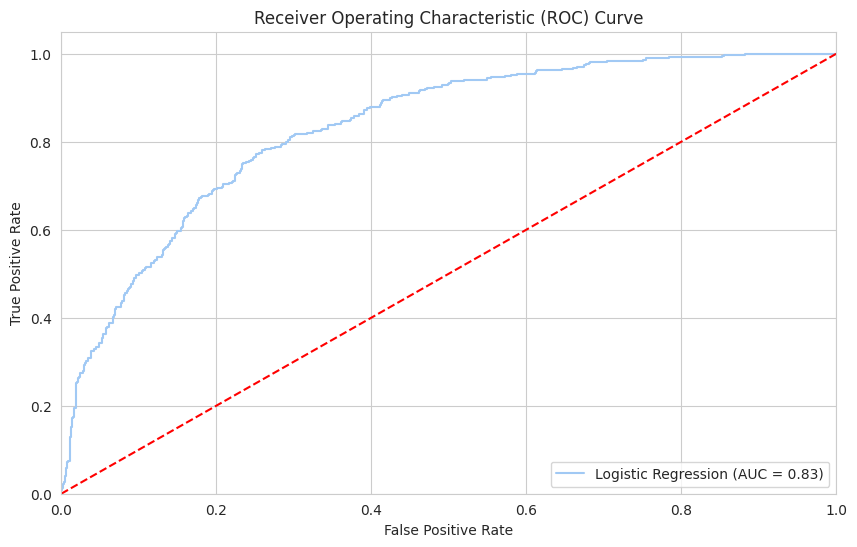

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
#7.1 Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Splitting the dataset into training and test sets
X = telco_df_dummies.drop('Churn', axis=1)
y = telco_df_dummies['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:,1]  # Probabilities for the positive class

# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(report)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import accuracy_score

X_test_scaled = scaler.transform(X_test)

# Predictions
y_pred = logistic_model.predict(X_test_scaled)

# Accuracy
laccuracy = accuracy_score(y_test, y_pred)

y_prob = logistic_model.predict_proba(X_test_scaled)[:,1]
lroc_auc = roc_auc_score(y_test, y_prob)


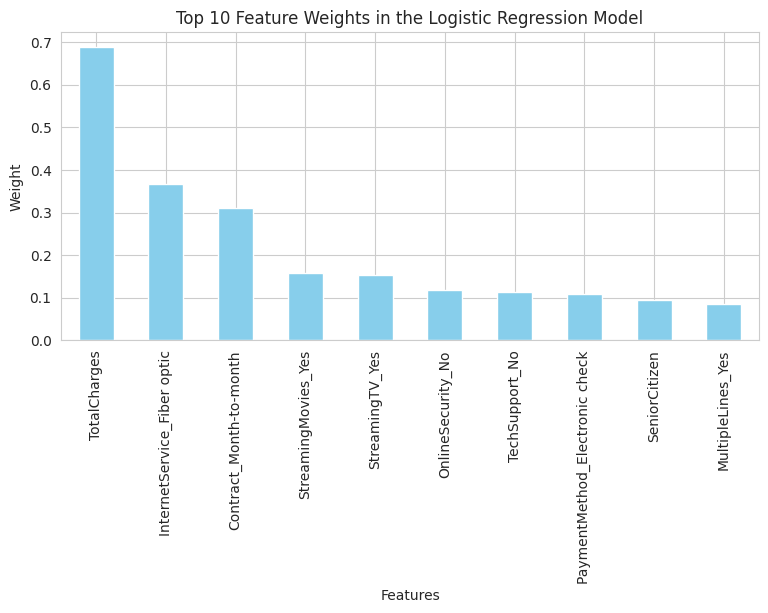

In [ ]:
# Extracting feature importances (weights) from the logistic regression model
feature_weights = pd.Series(logistic_model.coef_[0], index=X.columns.values)

# Sort the weights and select the top 10
top_weights = feature_weights.sort_values(ascending=False)[:10]

# Visualizing the top 10 features
plt.figure(figsize=(9, 4))
top_weights.plot(kind='bar', color='skyblue')
plt.title("Top 10 Feature Weights in the Logistic Regression Model")
plt.ylabel("Weight")
plt.xlabel("Features")
plt.show()


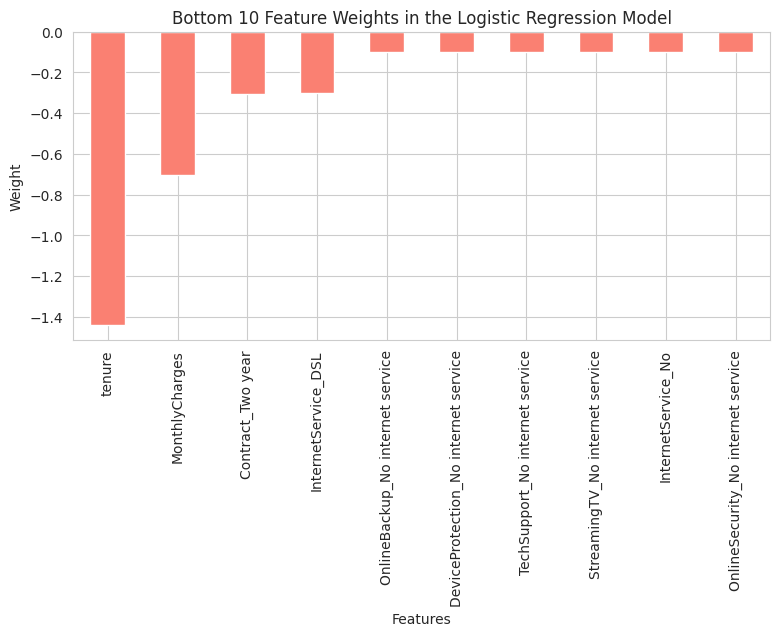

In [ ]:
#7.a.1 Sort the weights and select the bottom 10
bottom_weights = feature_weights.sort_values(ascending=True)[:10]

# Visualizing the bottom 10 features
plt.figure(figsize=(9, 4))
bottom_weights.plot(kind='bar', color='salmon')
plt.title("Bottom 10 Feature Weights in the Logistic Regression Model")
plt.ylabel("Weight")
plt.xlabel("Features")
plt.show()


Accuracy: 0.72
Decision Trees:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1033
           1       0.48      0.49      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.72      1407



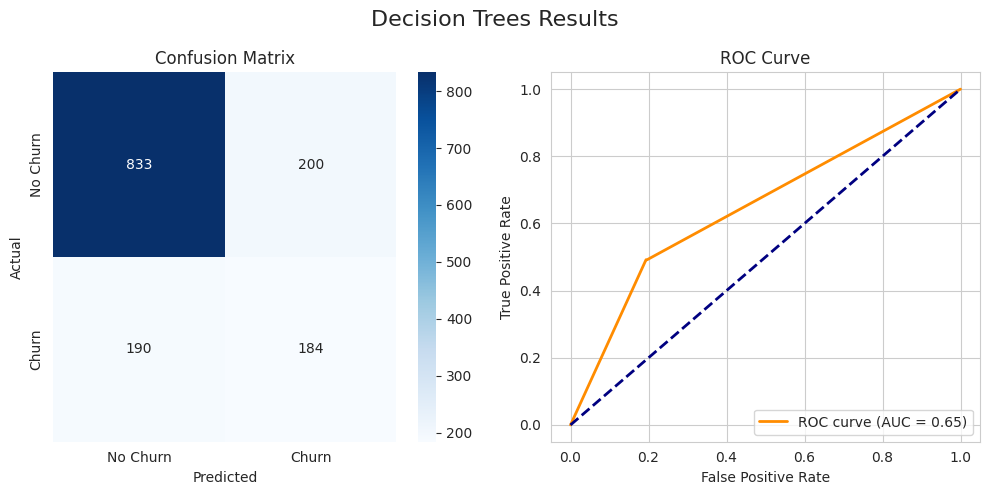

In [ ]:
#7.b) Decision Tree, Confusion Matrix, ROC

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import plot_tree


from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

daccuracy = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {daccuracy:.2f}")

print("Decision Trees:")
print(classification_report(y_test, y_pred_tree))


def plot_cm(y_true, y_pred, y_prob, title="Confusion Matrix and ROC Curve"):
    # Plotting confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
                xticklabels=["No Churn", "Churn"],
                yticklabels=["No Churn", "Churn"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    # Plotting ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = roc_auc_score(y_true, y_prob)
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

    # Overall title
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Using the function
plot_cm(y_test, y_pred_tree, y_prob_tree, "Decision Trees Results")


tree_model.fit(X_train, y_train)
y_pred_dt = tree_model.predict(X_test)
daccuracy = accuracy_score(y_test, y_pred_dt)


Accuracy: 0.78
Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.61      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



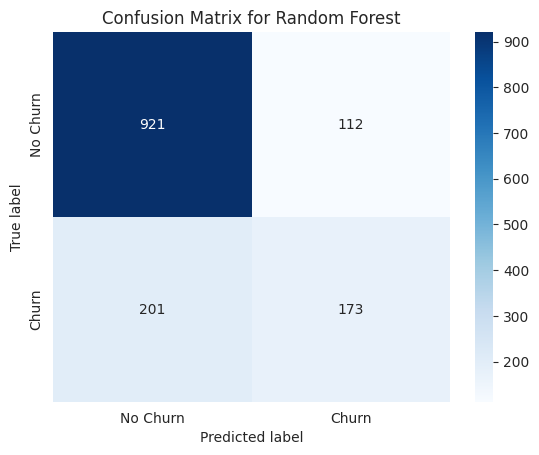

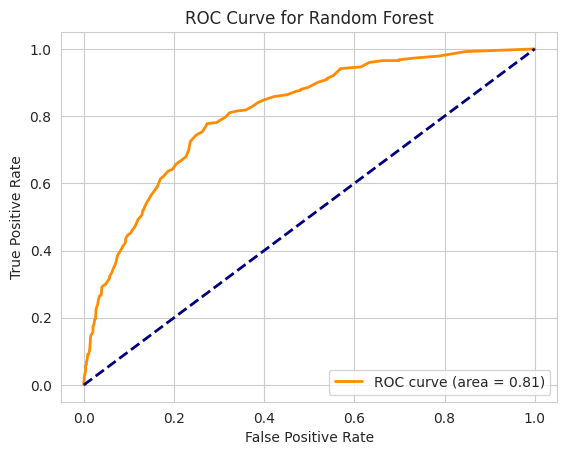

In [ ]:
#7.c) Random Forest
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

raccuracy = accuracy_score(y_test, y_pred_forest)
raccuracy = round(raccuracy, 2)
print(f"Accuracy: {raccuracy:.2f}")

print("Random Forest:")
print(classification_report(y_test, y_pred_forest))

#Random Forest
plot_confusion_matrix(y_test, y_pred_forest, "Confusion Matrix for Random Forest")
y_score_forest = forest_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_score_forest, "ROC Curve for Random Forest")


from sklearn.tree import plot_tree

forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
raccuracy = accuracy_score(y_test, y_pred_forest)

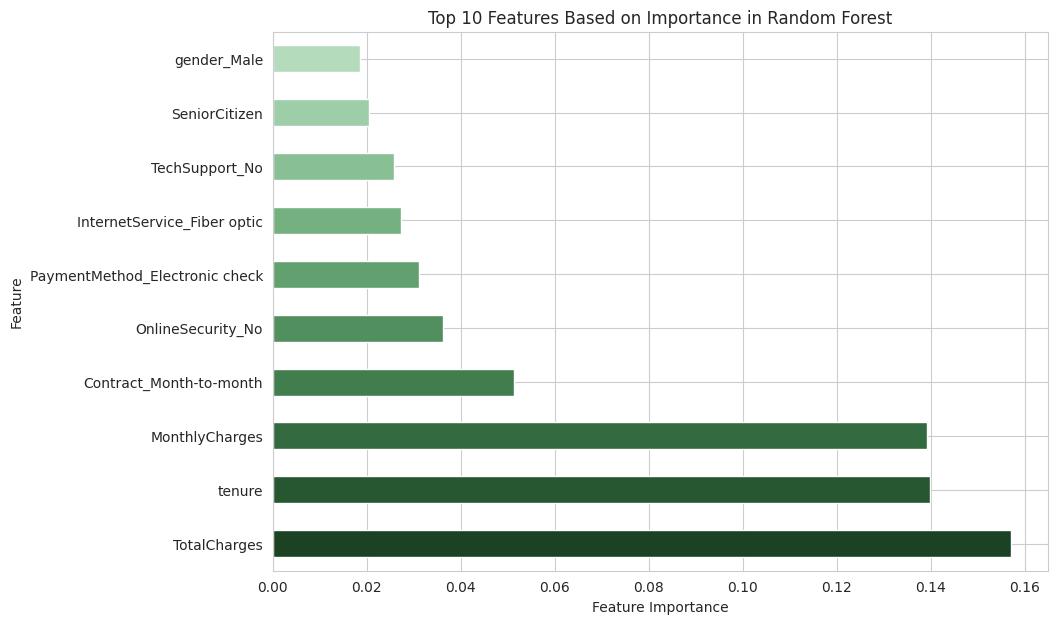

In [ ]:
import seaborn as sns

# Extracting the feature importances from the random forest model
feature_importances = forest_model.feature_importances_

# Mapping the importances to their corresponding features
feature_weights = pd.Series(feature_importances, index=X.columns.values)

# Getting a colorful palette from Seaborn
colors = sns.cubehelix_palette(10, start=2, rot=0, dark=0.2, light=0.8, reverse=True)

# Visualizing the top 10 features based on their importance
plt.figure(figsize=(10, 7))
feature_weights.nlargest(10).plot(kind='barh', color=colors)
plt.title("Top 10 Features Based on Importance in Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

Accuracy: 0.75
KNN:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.52      0.52      0.52       374

    accuracy                           0.75      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.75      0.75      0.75      1407



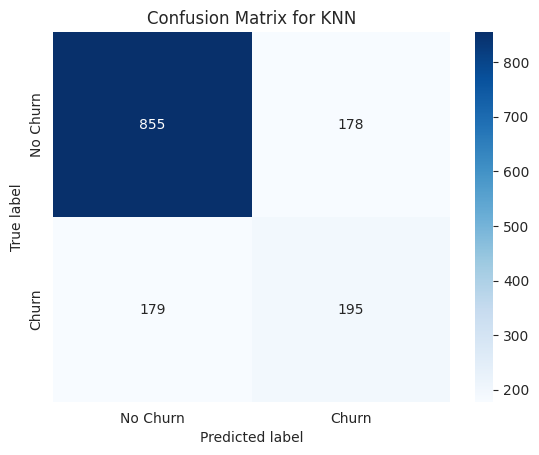

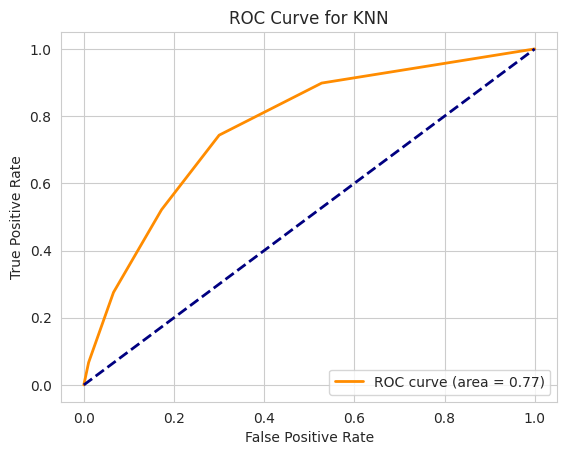

In [ ]:
#7.d) KNN Model

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors for this example
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

kaccuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {kaccuracy:.2f}")

print("KNN:")
print(classification_report(y_test, y_pred_knn))


# KNN
plot_confusion_matrix(y_test, y_pred_knn, "Confusion Matrix for KNN")
y_score_knn = knn_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_score_knn, "ROC Curve for KNN")

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
kaccuracy = accuracy_score(y_test, y_pred_knn)

Accuracy: 0.68
Naive Bayes:
              precision    recall  f1-score   support

           0       0.92      0.63      0.74      1033
           1       0.45      0.84      0.59       374

    accuracy                           0.68      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.79      0.68      0.70      1407



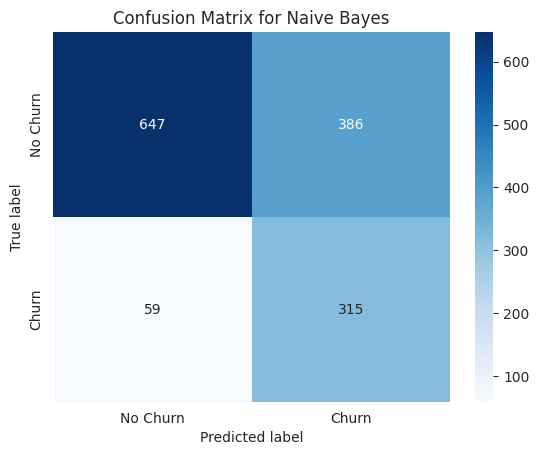

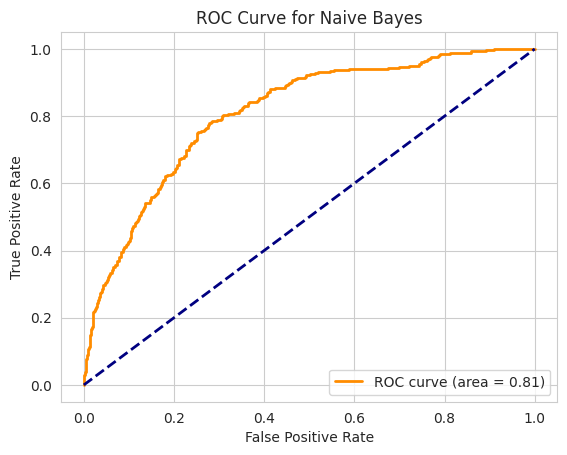

In [ ]:
#7.e) Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

naccuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {naccuracy:.2f}")

print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

#Naive Bayes
plot_confusion_matrix(y_test, y_pred_nb, "Confusion Matrix for Naive Bayes")
y_score_nb = nb_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_score_nb, "ROC Curve for Naive Bayes")


nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
naccuracy = accuracy_score(y_test, y_pred_nb)


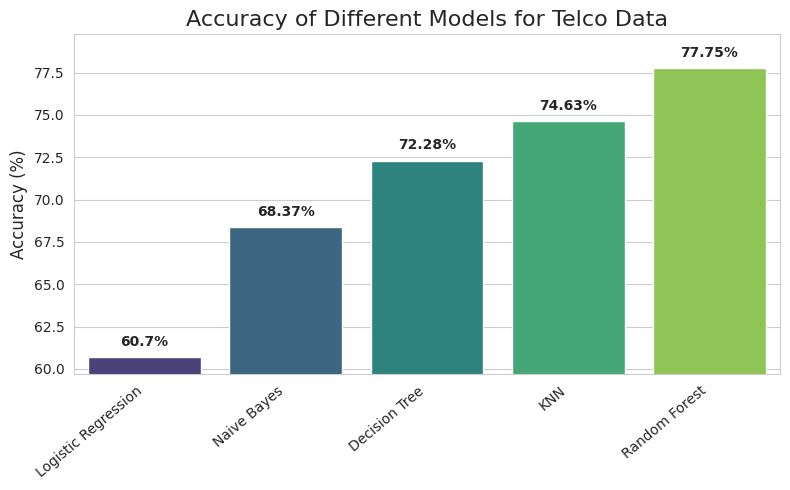

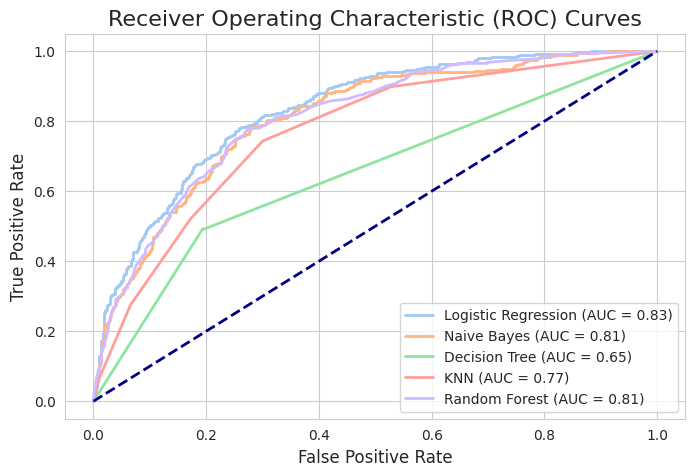

In [ ]:
# 7.f) Comparison among the models

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc


# Data Dictionary
data_telco = {
    'Naive Bayes': {'Accuracy': naccuracy*100, 'Model': nb_model},
    'Decision Tree': {'Accuracy': daccuracy*100, 'Model': tree_model},
    'KNN': {'Accuracy': kaccuracy*100, 'Model': knn_model},
    'Random Forest': {'Accuracy': raccuracy*100, 'Model': forest_model},
    'Logistic Regression': {'Accuracy': laccuracy*100, 'Model': logistic_model}
}

# Sorting data by accuracy for better visualization
sorted_data_telco = dict(sorted(data_telco.items(), key=lambda item: item[1]['Accuracy']))

# Creating lists for plots
models_telco = list(sorted_data_telco.keys())
accuracies_telco = [val['Accuracy'] for val in sorted_data_telco.values()]

# Colorful, professional plot
colors_telco = sns.color_palette('viridis', len(models_telco))

fig, ax = plt.subplots(figsize=(8, 5))

# Creating the bar plot with different colors
sns.barplot(x=models_telco, y=accuracies_telco, palette=colors_telco, ax=ax)

# Adding accuracy values on top of the bars
for i, accuracy in enumerate(accuracies_telco):
    ax.text(i, accuracy + 0.5, f"{round(accuracy, 2)}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adjusting labels & title
ax.set_xticklabels(models_telco, rotation=40, ha='right')
ax.set_ylabel("Accuracy (%)", fontsize=12)
ax.set_title("Accuracy of Different Models for Telco Data", fontsize=16)
ax.set_ylim([min(accuracies_telco) - 1, max(accuracies_telco) + 2])

plt.tight_layout()
plt.show()

# ROC Curves comparison
plt.figure(figsize=(8, 5))

for model_name, model_info in sorted_data_telco.items():
    model = model_info['Model']
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


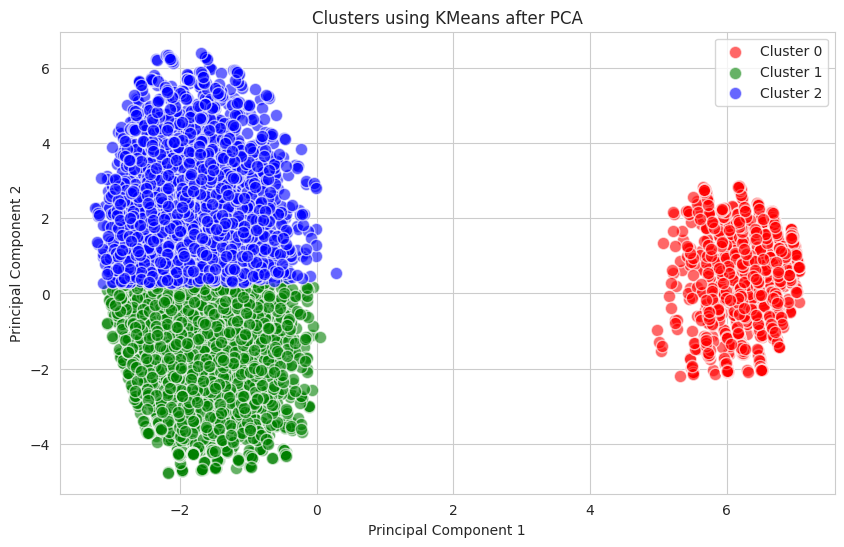

In [ ]:
#8. Dimension Reduction & Clustering


#a)Scaling the data
from sklearn.preprocessing import StandardScaler

# Drop the target variable 'Churn'
X = telco_df_dummies.drop('Churn', axis=1)

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#b) Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Convert to DataFrame for visualization
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

#c) Clustering using K-Means

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)
kmeans.fit(principal_df)

# Adding the cluster labels to our PCA data
principal_df['Cluster'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10,6))
colors = ['red', 'green', 'blue']
for cluster in range(3):
    subset = principal_df[principal_df['Cluster'] == cluster]
    plt.scatter(subset['principal component 1'], subset['principal component 2'], label=f"Cluster {cluster}", alpha=0.6, edgecolors='w', s=80, color=colors[cluster])

plt.legend()
plt.title('Clusters using KMeans after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()




In [ ]:
# Add the cluster labels to the original data
telco_df_dummies['Cluster'] = principal_df['Cluster']

# Check the first few rows to confirm
print(telco_df_dummies.head())

# Descriptive statistics for each cluster
cluster_means = telco_df_dummies.groupby('Cluster').mean()

# Analyzing each cluster based on the means
def analyze_cluster(cluster_id):
    means = cluster_means.loc[cluster_id]

    # Analyzing Customer Attributes
    senior_citizen_percentage = means['SeniorCitizen'] * 100
    has_partner_percentage = means['Partner_Yes'] * 100
    has_dependents_percentage = means['Dependents_Yes'] * 100

    # Service Usage
    phone_service_percentage = means['PhoneService_Yes'] * 100
    multiple_lines_percentage = means['MultipleLines_Yes'] * 100
    uses_internet_percentage = (means['InternetService_Fiber optic'] + means['InternetService_DSL']) * 100
    online_security_percentage = means['OnlineSecurity_Yes'] * 100

    # Billing & Charges
    average_monthly_charges = means['MonthlyCharges']
    average_total_charges = means['TotalCharges']

    # Churn Rate
    churn_rate = means['Churn'] * 100

    return {
        "Senior Citizen Percentage": senior_citizen_percentage,
        "Has Partner Percentage": has_partner_percentage,
        "Has Dependents Percentage": has_dependents_percentage,
        "Uses Phone Service Percentage": phone_service_percentage,
        "Uses Multiple Lines Percentage": multiple_lines_percentage,
        "Uses Internet Percentage": uses_internet_percentage,
        "Uses Online Security Percentage": online_security_percentage,
        "Average Monthly Charges": average_monthly_charges,
        "Average Total Charges": average_total_charges,
        "Churn Rate": churn_rate
    }

# Printing insights for each cluster
red_cluster_insights = analyze_cluster(0)
green_cluster_insights = analyze_cluster(1)
blue_cluster_insights = analyze_cluster(2)

print("\nRed Cluster Insights:")
for key, value in red_cluster_insights.items():
    print(f"{key}: {value:.2f}")

print("\nGreen Cluster Insights:")
for key, value in green_cluster_insights.items():
    print(f"{key}: {value:.2f}")

print("\nBlue Cluster Insights:")
for key, value in blue_cluster_insights.items():
    print(f"{key}: {value:.2f}")


   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0              1   
1              0      34           56.95       1889.50      0              0   
2              0       2           53.85        108.15      1              0   
3              0      45           42.30       1840.75      0              0   
4              0       2           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0            0           0            1              1  ...   
1            1           1            0              1  ...   
2            1           1            0              1  ...   
3            1           1            0              1  ...   
4            0           1            0              1  ...   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1   

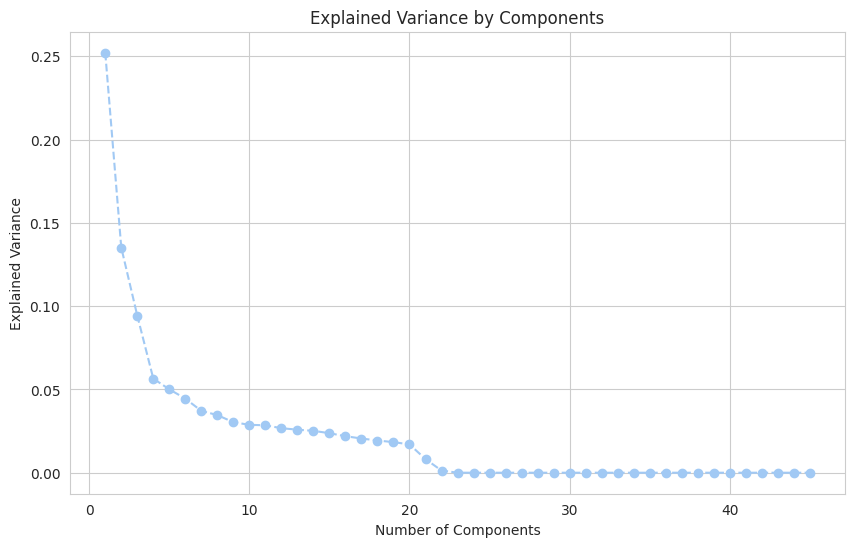

In [ ]:
# d.1) Determine number of components
pca_all = PCA()
pca_all.fit(X_scaled)
explained_variance = pca_all.explained_variance_ratio_

# Plotting
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()



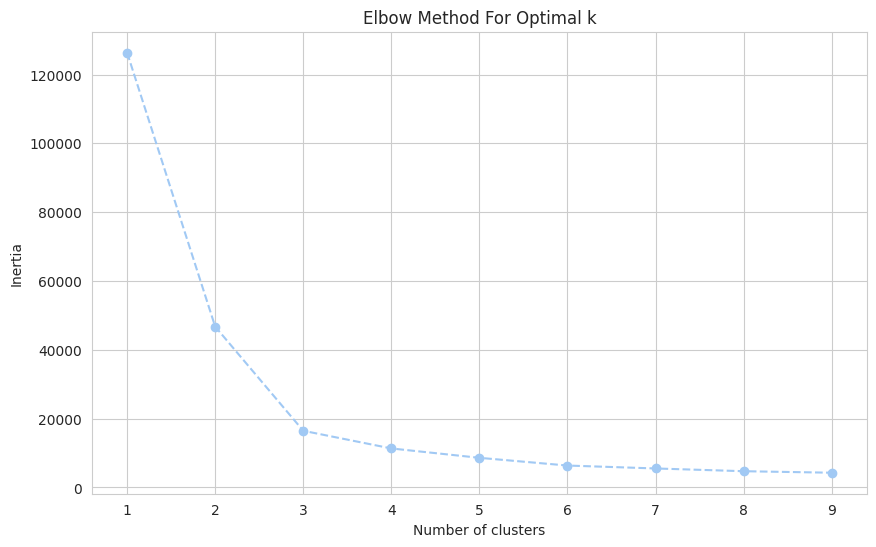

In [ ]:

# e.1) Determine number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(principal_df)
    inertia.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Association rule mining typically works best with datasets where the primary focus is transactions, and the data represents whether or not an item was present in the transaction. Our telco_df dataset isn't transactional data in the classic sense.

Scaled Data (first 5 rows):
        0         1         2         3         4         5         6    \
0 -0.426043  1.575594 -1.381182 -0.202550 -0.037743 -0.037743 -0.037743   
1  2.347181 -0.713430  0.687997 -0.420803 -0.037743 -0.037743 -0.037743   
2 -0.426043  1.207715  1.101150  1.779021 -0.037743 -0.037743 -0.037743   
3 -0.426043 -0.999558  0.397766 -0.741722 -0.037743 -0.037743 -0.037743   
4 -0.426043 -0.836057  0.544589 -0.611501 -0.037743 -0.037743 -0.037743   

        7         8         9    ...       738       739       740       741  \
0 -0.037743 -0.037743 -0.037743  ... -0.813596 -1.176032 -0.489754  1.849698   
1 -0.037743 -0.037743 -0.037743  ...  1.229111  0.850317 -0.489754 -0.540629   
2 -0.037743 -0.037743 -0.037743  ...  1.229111 -1.176032 -0.489754  1.849698   
3 -0.037743 -0.037743 -0.037743  ... -0.813596  0.850317 -0.489754 -0.540629   
4 -0.037743 -0.037743 -0.037743  ... -0.813596  0.850317 -0.489754 -0.540629   

        742       743       744       74

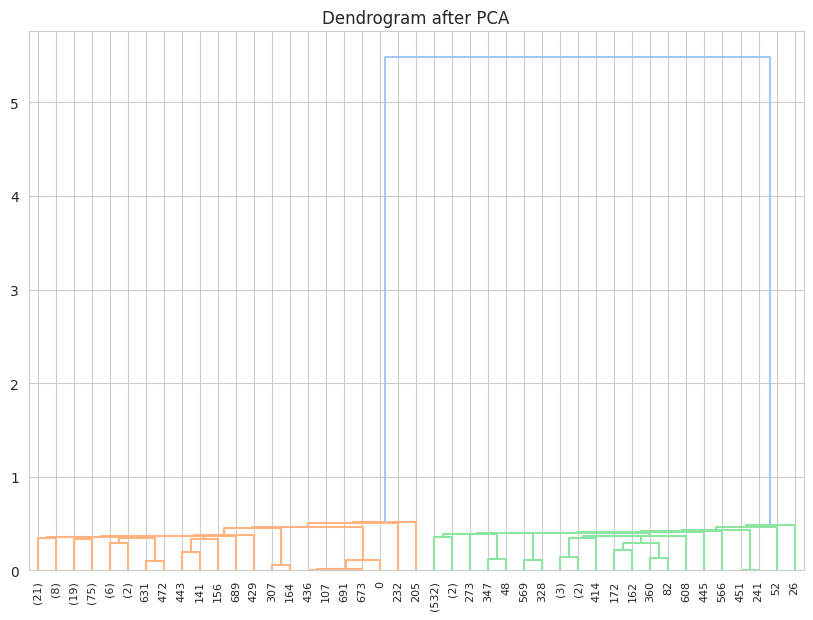

In [ ]:
 import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Assuming X is your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Printing the first few rows of the scaled data for inspection
print("Scaled Data (first 5 rows):")
print(pd.DataFrame(X_scaled).head())

# Step 1: Perform PCA
pca = PCA(n_components=2)  # Reduce it to 2 components for visualization purposes
X_pca = pca.fit_transform(X_scaled)

# Printing the amount of variance that each PC explains
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance by PCA components:")
print(f"Component 1: {explained_variance[0]*100:.2f}%")
print(f"Component 2: {explained_variance[1]*100:.2f}%")

# Printing the first few rows of the PCA-transformed data
print("\nPCA Transformed Data (first 5 rows):")
print(pd.DataFrame(X_pca, columns=['PC1', 'PC2']).head())

# Step 2: Apply Hierarchical Clustering
linked = linkage(X_pca, 'single')  # Using 'single' linkage method as an example. You can change it as needed.

# Step 3: Plot Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           truncate_mode='level',  # Truncate the dendrogram for a clearer visualization
           p=10,  # Show only the last p merged clusters
           show_leaf_counts=True)
plt.title('Dendrogram after PCA')
plt.show()


In [ ]:
#9. Association Rule

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Example selected columns based on possible relevance to churn
selected_columns = ['Churn', 'Contract', 'InternetService', 'PaymentMethod']

# Ensure selected columns exist in the dataframe
try:
    telco_df_selected = telco_df[selected_columns]
except KeyError as e:
    print(f"Error: {e}")
    print("Please ensure to use correct column names.")
    # Handle error or exit as appropriate for your use case

# Convert categorical variables to dummy variables (0s and 1s)
telco_df_dummies = pd.get_dummies(telco_df_selected)

# Ensure all values are boolean
telco_df_dummies_binary = telco_df_dummies.astype(bool)

min_support_value = 0.05

# Apply the apriori algorithm with a minimum support threshold
try:
    itemsets = apriori(telco_df_dummies_binary, min_support=min_support_value, use_colnames=True, low_memory=True) # low_memory parameter is optional and may slow down computation
except MemoryError:
    print("Memory Error: Try increasing the min_support_value")
    # Handle or exit

# Generate association rules with a minimum confidence threshold
# You might also experiment with different metrics like 'lift' or 'leverage' and adjust the min_threshold accordingly.
min_threshold_value = 0.5
rules = association_rules(itemsets, metric='confidence', min_threshold=min_threshold_value)

# Sort and display rules by lift value
sorted_rules = rules.sort_values(by='lift', ascending=False)
print(sorted_rules.head(10))


                                          antecedents  \
73        (Churn_Yes, PaymentMethod_Electronic check)   
46             (PaymentMethod_Mailed check, Churn_No)   
72           (InternetService_Fiber optic, Churn_Yes)   
70  (Contract_Month-to-month, InternetService_Fibe...   
49  (Contract_Month-to-month, InternetService_Fibe...   
51                                        (Churn_Yes)   
53  (Contract_Month-to-month, PaymentMethod_Electr...   
55                                        (Churn_Yes)   
68  (Contract_Month-to-month, Churn_Yes, InternetS...   
57  (InternetService_Fiber optic, PaymentMethod_El...   

                                          consequents  antecedent support  \
73  (Contract_Month-to-month, InternetService_Fibe...            0.152304   
46                               (InternetService_No)            0.184300   
72  (Contract_Month-to-month, PaymentMethod_Electr...            0.184443   
70                                        (Churn_Yes)           

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample Data (10%)
sample_df = telco_df.sample(frac=0.1, random_state=1)

# Manually Create Dummies for Selected Columns
selected_df = sample_df[['InternetService', 'Contract', 'PaymentMethod']].copy()
selected_df_dummies = pd.get_dummies(selected_df)

# Convert to boolean
selected_df_dummies = selected_df_dummies.astype(bool)

# Adjusting parameters: Increasing min_support and setting use_colnames=True
itemsets = apriori(selected_df_dummies, min_support=0.1, use_colnames=True)

# Generate association rules with a higher confidence threshold
rules = association_rules(itemsets, metric='confidence', min_threshold=0.7)

# Displaying the top 10 rules, if there are that many
print("Number of Rules Generated: ", len(rules))
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Number of Rules Generated:  4
                                         antecedents  \
0                      (InternetService_Fiber optic)   
1                   (PaymentMethod_Electronic check)   
2  (InternetService_Fiber optic, PaymentMethod_El...   
3  (Contract_Month-to-month, PaymentMethod_Electr...   

                     consequents   support  confidence      lift  
0      (Contract_Month-to-month)  0.348506    0.749235  1.290962  
1      (Contract_Month-to-month)  0.267425    0.803419  1.384322  
2      (Contract_Month-to-month)  0.193457    0.855346  1.473795  
3  (InternetService_Fiber optic)  0.193457    0.723404  1.555209  


In [ ]:
#10. Neural Network

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Ensure 'Churn' is present and accessible
print(telco_df['Churn'].head())

# Stratified sampling of 5% data considering 'Churn'
_, sample_data = train_test_split(telco_df, stratify=telco_df['Churn'], test_size=0.05, random_state=42)

# Ensure 'Churn' is present in the sample and accessible
print(sample_data['Churn'].head())

# Convert categorical variables to dummy variables (0s and 1s)
sample_data_dummies = pd.get_dummies(sample_data)

# Separate predictors and target
X = sample_data_dummies.drop(columns='Churn_Yes') # Assuming 'Churn_Yes' is the dummy variable for Churn after get_dummies
y = sample_data_dummies['Churn_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model - use a smaller batch size and few epochs to prevent memory issues
model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10, batch_size=32, verbose=2)


0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object
1864    No
1096    No
2768    No
3207    No
4176    No
Name: Churn, dtype: object
Epoch 1/10
8/8 - 1s - loss: 0.7179 - accuracy: 0.5437 - val_loss: 0.6412 - val_accuracy: 0.5862 - 1s/epoch - 152ms/step
Epoch 2/10
8/8 - 0s - loss: 0.5293 - accuracy: 0.7381 - val_loss: 0.5596 - val_accuracy: 0.6897 - 57ms/epoch - 7ms/step
Epoch 3/10
8/8 - 0s - loss: 0.4433 - accuracy: 0.7817 - val_loss: 0.5285 - val_accuracy: 0.6897 - 48ms/epoch - 6ms/step
Epoch 4/10
8/8 - 0s - loss: 0.3830 - accuracy: 0.8373 - val_loss: 0.5241 - val_accuracy: 0.7586 - 46ms/epoch - 6ms/step
Epoch 5/10
8/8 - 0s - loss: 0.3273 - accuracy: 0.8849 - val_loss: 0.5271 - val_accuracy: 0.7586 - 47ms/epoch - 6ms/step
Epoch 6/10
8/8 - 0s - loss: 0.2802 - accuracy: 0.9246 - val_loss: 0.5325 - val_accuracy: 0.7241 - 53ms/epoch - 7ms/step
Epoch 7/10
8/8 - 0s - loss: 0.2396 - accuracy: 0.9524 - val_loss: 0.5373 - val_accuracy: 0.6897 - 63ms/epoch - 8ms/step
Epoch 

In [ ]:
#10.1 Calculating Support, Confidence, Lift, Leverage, and Conviction

import pandas as pd

# Creating a small sample of your data
data = {
    'Churn_No': [True, True, False, True, False],
    'Churn_Yes': [False, False, True, False, True],
    'Contract_Month-to-month': [True, False, True, False, True],
    'Contract_One year': [False, True, False, True, False],
    'Contract_Two year': [False, False, False, False, False],
    'InternetService_DSL': [True, True, True, True, False],
    'InternetService_Fiber optic': [False, False, False, False, True],
    'InternetService_No': [False, False, False, False, False],
    'Churn': [0, 0, 1, 0, 1]
}

telco_df_dummies_binary = pd.DataFrame(data)

# Example itemsets for metric calculation
X = 'InternetService_Fiber optic'
Y = 'Churn'

# Check for column existence
if X not in telco_df_dummies_binary.columns or Y not in telco_df_dummies_binary.columns:
    raise KeyError(f"Column(s) {X} or {Y} not found in telco_df_dummies_binary.")

def support(data, X, Y=None):
    """Calculate the support of itemset X or [X and Y] in data."""
    if Y:
        return len(data[(data[X] == 1) & (data[Y] == 1)]) / len(data)
    else:
        return len(data[data[X] == 1]) / len(data)

def confidence(data, X, Y):
    """Calculate the confidence of rule X -> Y in data."""
    return support(data, X, Y) / support(data, X)

def lift(data, X, Y):
    """Calculate the lift of rule X -> Y in data."""
    return confidence(data, X, Y) / support(data, Y)

def leverage(data, X, Y):
    """Calculate the leverage of rule X -> Y in data."""
    return support(data, X, Y) - (support(data, X) * support(data, Y))

def conviction(data, X, Y):
    """Calculate the conviction of rule X -> Y in data."""
    denom = 1 - confidence(data, X, Y)
    if denom == 0:
        return float('inf')  # Return infinity if denominator is 0
    return (1 - support(data, Y)) / denom

# Calculating metric values
try:
    support_X = support(telco_df_dummies_binary, X)
    support_Y = support(telco_df_dummies_binary, Y)
    support_X_and_Y = support(telco_df_dummies_binary, X, Y)
    conf = confidence(telco_df_dummies_binary, X, Y)
    lif = lift(telco_df_dummies_binary, X, Y)
    lever = leverage(telco_df_dummies_binary, X, Y)
    conv = conviction(telco_df_dummies_binary, X, Y)

    print(f"Support of {X}: {support_X}")
    print(f"Support of {Y}: {support_Y}")
    print(f"Support of {X} and {Y}: {support_X_and_Y}")
    print(f"Confidence of {X} -> {Y}: {conf}")
    print(f"Lift of {X} -> {Y}: {lif}")
    print(f"Leverage of {X} -> {Y}: {lever}")
    print(f"Conviction of {X} -> {Y}: {conv}")
except KeyError as e:
    print(f"Error: {e}")
    print("Debug Info:")
    print("Preview of Data:\n", telco_df_dummies_binary.head())
    print("\nColumns in Data:\n", telco_df_dummies_binary.columns)



Support of InternetService_Fiber optic: 0.2
Support of Churn: 0.4
Support of InternetService_Fiber optic and Churn: 0.2
Confidence of InternetService_Fiber optic -> Churn: 1.0
Lift of InternetService_Fiber optic -> Churn: 2.5
Leverage of InternetService_Fiber optic -> Churn: 0.12
Conviction of InternetService_Fiber optic -> Churn: inf


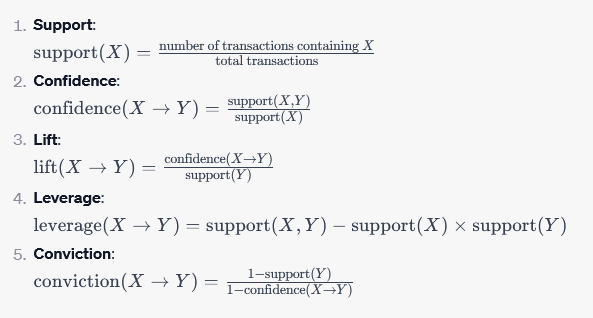

In [ ]:
#10.2 Performace Calculate

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Convert 'Churn' to binary and an appropriate datatype
telco_df['Churn_binary'] = telco_df['Churn'].map({'No': 0, 'Yes': 1}).astype(int)

# Use a subset of data for quicker runs during testing
sample_data = telco_df.sample(frac=0.1, random_state=1)

# Convert categorical variables to dummy variables and remove the original 'Churn'
sample_data_dummies = pd.get_dummies(sample_data.drop(columns=['Churn']))

# Define predictors and outcome variable
predictors = [col for col in sample_data_dummies.columns if col != 'Churn_binary']
outcome = 'Churn_binary'

# Split the data
X = sample_data_dummies[predictors]
y = sample_data_dummies[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Train a simplified neural network model
clf = MLPClassifier(hidden_layer_sizes=[5], activation='logistic', solver='lbfgs', random_state=1, max_iter=100)
clf.fit(train_X, train_y)

# Validate the model
predicted = clf.predict(valid_X)
print(classification_report(valid_y, predicted))

# Optionally, show the confusion matrix for further insights
print(confusion_matrix(valid_y, predicted))


              precision    recall  f1-score   support

           0       0.81      0.94      0.87       210
           1       0.66      0.35      0.45        72

    accuracy                           0.79       282
   macro avg       0.73      0.64      0.66       282
weighted avg       0.77      0.79      0.76       282

[[197  13]
 [ 47  25]]
